Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [1]:
   
from itertools import accumulate
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
from tqdm.auto import tqdm


## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [2]:
UNIVERSE_SIZE = 10_000
NUM_SETS = 1_000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [3]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [4]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Have Fun!

In [5]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution) 

(np.True_, np.float64(4276606.580923007))

In [6]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
valid(solution), cost(solution)

(np.True_, np.float64(2137613.93396343))

# SIMPLE RHMC: 

In [7]:
def single_mutation (solution: np.array ) -> np.array:
    new_solution = solution.copy()
    i = rng.integers(0,NUM_SETS)
    new_solution[i] = not new_solution[i]
    return new_solution


def multiple_mutation (solution: np.ndarray ) -> np.ndarray:
    mask = rng.random(NUM_SETS) < 0.01
    new_solution = np.logical_xor(solution, mask) #genera molti falsi
    return new_solution 


In [8]:
a= np.array([True, True, False, False ])
b= np.array([True, False, True, False ])
np.logical_xor(a,b) 

array([False,  True,  True, False])

In [9]:
def fitness(solution: np.array) : # quanto sei vicino alla solz ottimale 
    return ( valid(solution) , -cost(solution)) #min

ic| fitness(solution): (np.True_, np.float64(-4276606.580923007))


  0%|          | 0/10000 [00:00<?, ?it/s]

ic| fitness(solution): (np.True_, np.float64(-489423.47579649364))
ic| history.index(float(solution_fitness[1])): 9504


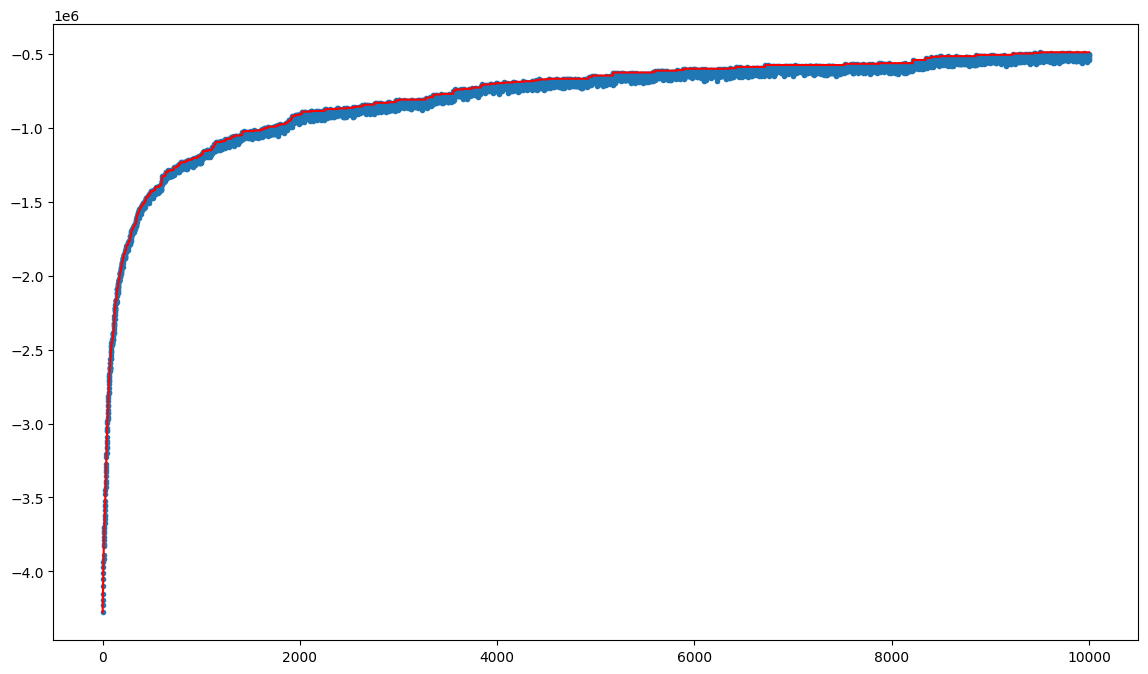

In [10]:
MAX_STEPS=10_000
solution = rng.random(NUM_SETS) < 1 # soluzione iniziale random 


solution_fitness = fitness(solution)
history = [float( solution_fitness[1] )] #only the cost

ic(fitness(solution))

tweak = multiple_mutation # 


#for steps in range(10_000): 
for steps in tqdm(range(MAX_STEPS)):

    new_solution = tweak(solution)
    f = fitness(new_solution)

    history.append(float(f[1]))
    
    if f > solution_fitness:
        solution = new_solution
        solution_fitness = fitness(solution)

        #ic(fitness(solution))

#ic(solution)
ic(fitness(solution))
ic(history.index(float(solution_fitness[1])))  # Cerca solo il costo nella lista `history`




plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")


# STEEPEST STEP: 

ic| fitness(solution): (np.True_, np.float64(-4276606.580923007))


  0%|          | 0/4000 [00:00<?, ?it/s]

ic| fitness(solution): (np.True_, np.float64(-127349.22575225227))
ic| history.index(float(solution_fitness[1])): 6732


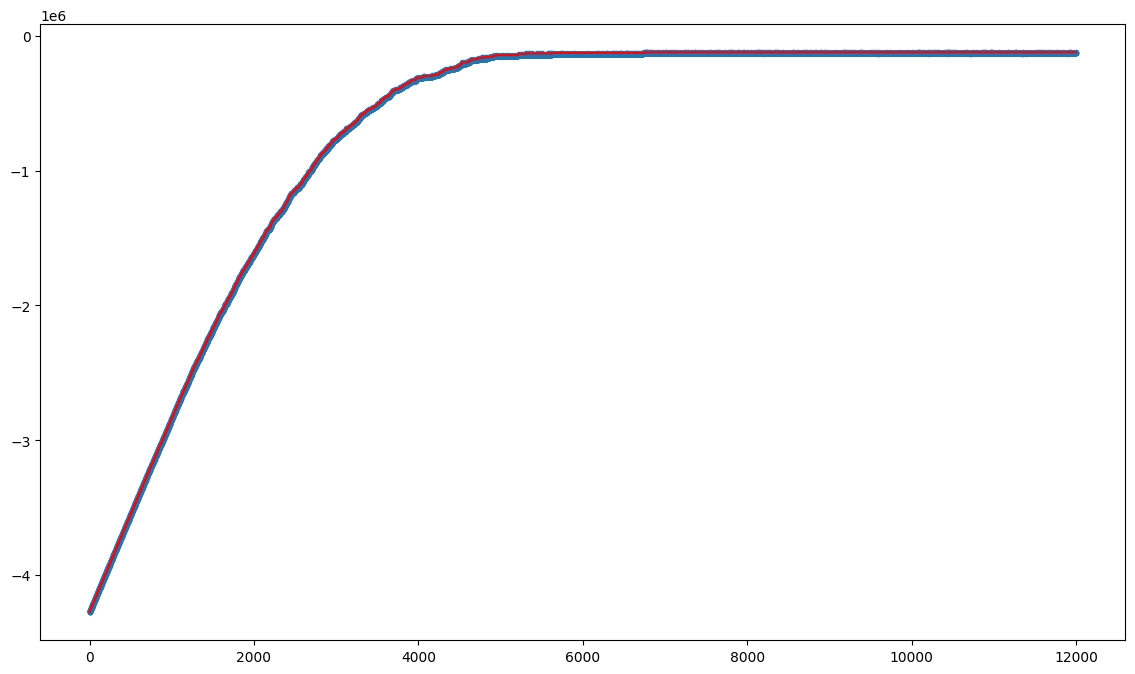

In [11]:

STEEPEST_STEP_CANDIDATES = 3
MAX_STEPS= 4_000




solution = rng.random(NUM_SETS) < 1 # soluzione iniziale random

solution_fitness = fitness(solution) 
history = [float( solution_fitness[1] )]

ic(fitness(solution))


tweak = single_mutation  


#for steps in range(2_000):  
for steps in tqdm(range(MAX_STEPS)):

    candidates = [single_mutation(solution) for _ in range(STEEPEST_STEP_CANDIDATES)]
      # Trova il miglior candidato in base al fitness
    candidates_fitness = list()
    for c in candidates:
            f = fitness(c)
            history.append(float (f[1]))  #
            candidates_fitness.append(f)

    idx = candidates_fitness.index(max(candidates_fitness)) # trova indice candidato migliore

    # keep candidate solution that yielded the steepest ascent
    new_solution = candidates[idx] #  candidato migliore 
    
    #f = fitness(new_solution)
    f = candidates_fitness[idx]


    
    if f > solution_fitness:
        solution = new_solution
        solution_fitness = fitness(solution)



#ic(solution)
ic(fitness(solution))
ic(history.index(float(solution_fitness[1]))) # num steps per trovare la soluzione migliore



plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")
